In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import mpld3
import matplotlib.colors
from mpld3 import plugins

In [1]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [17]:
%matplotlib inline

In [15]:
mpld3.enable_notebook()


In [14]:
css = """
table
{
  border-collapse: collapse;
}
th
{
  color: #ffffff;
  background-color: #000000;
}
td
{
  background-color: #cccccc;
}
table, th, td
{
  font-family:Arial, Helvetica, sans-serif;
  border: 1px solid black;
  text-align: right;
}
"""

In [8]:
file_ratio = "plot_ratio_lumin_sum_o.dat"
xlab = 'O luminosity  (in 10^28 erg/s/cm^2)'
ylab = 'O VIII/O VII ratio'
tess_data = "cool-star-list-crossmatched-eyeballed.csv"
simbad_table = "simbad.csv"
accreting_stars = ['TW_Hydrae' , 'SU_Aur' , 'T_Tau' , 'IM_Lup']
save="O-trend_tess"

def prepare_files_luminosityratio(file1, file2, file3):
    df=pd.read_csv(file1, delim_whitespace=True);
    table=pd.read_csv(file2, delimiter=";" );
    tess=pd.read_csv(file3);
    S=len(table)
    N=len(df)
    indices=[]
    for i in range(N):
        for j in range(S):
            if (df['match_star'][i] == table['typedident'][j]):
                df['var.name'][i] = table['spectype'][j]

        
    df1=df.rename(columns={"var.name": "spectral_type"})
    ind = df['var.gl_mod'] < 0.5
    tess_ind=tess['N_flares_per_day'] > 0 
    z=df1['match_star'].isin(tess[tess_ind]['GivenName']);
    z2=df1['match_star'].isin(tess[tess_ind]['GivenName']);
    df2=df1.loc[ind]
    df2.reset_index(inplace=True, drop=True)
    labels2 = []
    N=len(df2)
    for i in range(N):
        labels2.append(str(df2['match_star'][i][:10].replace('_', ' ')) + ', ' + df2['spectral_type'][i])


    df3=df1.loc[~ind]
    df3.reset_index(inplace=True, drop=True)
    labels3 = []
    NN=len(df3)
    for i in range(NN):
        labels3.append(str(df3['match_star'][i][:9].replace('_', ' ')) + ', ' + df3['spectral_type'][i])
    

    df4=df1.loc[~z]
    df4.reset_index(inplace=True, drop=True)
    labels4 = []
    N=len(df4)
    for i in range(N):
        labels4.append(str(df4['match_star'][i][:10].replace('_', ' ')) + ', ' + df4['spectral_type'][i])

    df5=df1.loc[z]
    df5.reset_index(inplace=True, drop=True)
    labels5 = []
    N=len(df5)
    for i in range(N):
        labels5.append(str(df5['match_star'][i][:10].replace('_', ' ')) + ', ' + df5['spectral_type'][i])
    return (df2, labels2), (df3, labels3), (df4, labels4), (df5, labels5) 
        

In [17]:
def mpl_plot_ratio(df2, labels2, df3, labels3, df4, labels4, df5, labels5, xlab, ylab, save):     
    fig, ax = plt.subplots(figsize=(8, 6))
    #ax.set_xlim(0.01, None)
    #ax.set_ylim(0.01, None)
    

#    point2 = ax.errorbar(df2["Lxtot"], df2["r1"],fmt='o', color='g', label='constant in X-rays')

   # point3 = ax.errorbar(df3["Lxtot"], df3["r1"],fmt='o', color='b', label='variable in X-rays')

    #point4 = ax.errorbar(df4["Lxtot"], df4["r1"],fmt='x', color='r', label='non flaring in TESS')

    #point5 = ax.errorbar(df5["Lxtot"], df5["r1"],fmt='x', color='y', label='flaring in TESS')

    #point2 = ax.errorbar(df2["Lxtot"], df2["r1"], xerr=[(df2["Lxtoterr1"]),(df2["Lxtoterr2"])],
   #                 yerr=[(df2["r1le"]),(df2["r1ue"])],fmt='o', color='g', label='constant in X-rays')

    #point3 = ax.errorbar(df3["Lxtot"], df3["r1"], xerr=[(df3["Lxtoterr1"]),df3["Lxtoterr2"]],
    #                yerr=[(df3["r1le"]),(+ df3["r1ue"])],fmt='o', color='b', label='variable in X-rays')

    #point4 = ax.errorbar(df4["Lxtot"], df4["r1"], xerr=[(df4["Lxtot"] - df4["Lxtoterr1"]),df4["Lxtoterr2"] - df4["Lxtot"]],
     #               yerr=[(- df4["r1le"]),(+ df4["r1ue"])],fmt='x', color='r', label='non flaring in TESS')

    #point5 = ax.errorbar(df5["Lxtot"], df5["r1"], xerr=[(df5["Lxtot"] - df5["Lxtoterr1"]),df5["Lxtoterr2"] - df5["Lxtot"]],
      #              yerr=[(df5["r1le"]),(df5["r1ue"])],fmt='x', color='y', label='flaring in TESS')



    

    point2 = ax.errorbar(df2["Lxtot"], df2["r1"], xerr=[(df2["Lxtot"] - df2["Lxtoterr1"]),df2["Lxtoterr2"] - df2["Lxtot"]],
                    yerr=[(df2["r1"] - df2["r1le"]),(-df2["r1"] + df2["r1ue"])],fmt='o', color='g', label='constant in X-rays')

    point3 = ax.errorbar(df3["Lxtot"], df3["r1"], xerr=[(df3["Lxtot"] - df3["Lxtoterr1"]),df3["Lxtoterr2"] - df3["Lxtot"]],
                    yerr=[(df3["r1"] - df3["r1le"]),(-df3["r1"] + df3["r1ue"])],fmt='o', color='b', label='variable in X-rays')

    point4 = ax.errorbar(df4["Lxtot"], df4["r1"], xerr=[(df4["Lxtot"] - df4["Lxtoterr1"]),df4["Lxtoterr2"] - df4["Lxtot"]],
                    yerr=[(df4["r1"] - df4["r1le"]),(-df4["r1"] + df4["r1ue"])],fmt='x', color='r', label='non flaring in TESS')

    point5 = ax.errorbar(df5["Lxtot"], df5["r1"], xerr=[(df5["Lxtot"] - df5["Lxtoterr1"]),df5["Lxtoterr2"] - df5["Lxtot"]],
                    yerr=[(df5["r1"] - df5["r1le"]),(-df5["r1"] + df5["r1ue"])],fmt='x', color='y', label='flaring in TESS')

#ax.scatter(df1['Lxtot'][df1["match_star"].isin(accreting_stars)], df1['r1'][df1["match_star"].isin(accreting_stars)], s=100, facecolors='none', edgecolors='r')
#ax.scatter(df1['Lxtot'][df1["match_star"].isin(accreting_stars)], df1['r1'][df1["match_star"].isin(accreting_stars)], s=100, facecolors='none', edgecolors='none')


    ax.set_xscale('log')
    ax.legend(loc='upper left')
    ax.set_xlabel(xlab,fontsize=15)
    ax.set_ylabel(ylab,fontsize=15)
    ax.xaxis.labelpad = 20
    ax.yaxis.labelpad = 20
    tooltip2 = plugins.PointHTMLTooltip(point2[0], labels2,voffset=10, hoffset=10, css=css)
    plugins.connect(fig, tooltip2)
    tooltip3 = plugins.PointHTMLTooltip(point3[0], labels3,voffset=10, hoffset=10, css=css)
    plugins.connect(fig, tooltip3)
    tooltip4 = plugins.PointHTMLTooltip(point4[0], labels4,voffset=10, hoffset=10, css=css)
    plugins.connect(fig, tooltip4)
    tooltip5 = plugins.PointHTMLTooltip(point5[0], labels5,voffset=10, hoffset=10, css=css)
    plugins.connect(fig, tooltip5)
    mpld3.save_html(fig, save + '.html')
    plt.savefig(save + ".png")
 

In [18]:
d2, d3, d4, d5 = prepare_files_luminosityratio(file_ratio, simbad_table, tess_data)  

/Users/hamogu/anaconda3/envs/ciao/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


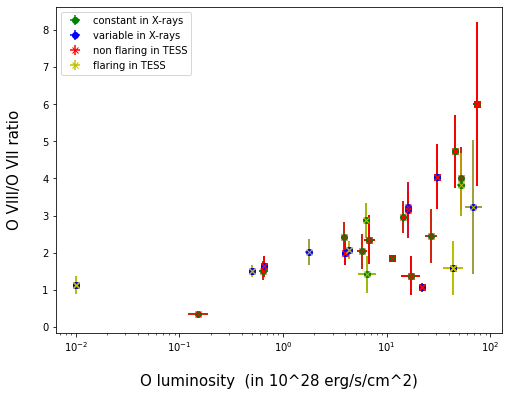

In [19]:
mpl_plot_ratio(*d2, *d3, *d4, *d5, xlab, ylab, save)

In [22]:
d2[0]

,Lxtot,Lxtoterr1,Lxtoterr2,r1,r1ue,r1le,match_star,spectral_type,var.gl_mod
0,6.78,6.00,7.68,2.35,3.02,1.69,24_UMa,G5III-IV,0.00
1,6.78,6.00,7.68,2.35,3.02,1.69,24_UMa,G5III-IV,0.00
2,3.89,3.63,4.17,2.43,2.82,2.04,44_Boo__i_Boo_,G0Vn,0.46
3,6.32,5.93,6.73,2.87,3.34,2.41,AB_Dor,K0V,0.24
4,0.64,0.59,0.71,1.52,1.78,1.26,AD_Leo,M4Vae,0.20
...,...,...,...,...,...,...,...,...,...
64,5.80,5.20,6.47,2.04,2.51,1.56,VW_Cep,G8V+K0V,0.45
65,14.42,13.62,15.27,2.97,3.40,2.53,lambda_And,G8IVk,0.03
66,0.15,0.12,0.19,0.34,0.43,0.24,procyon,F5IV-V+DQZ,0.00
67,46.03,43.51,48.69,4.73,5.70,3.75,sigma_Gem,K1IIIe,0.02


In [37]:
from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg import autompg as df

colors = ["red", "olive", "darkred", "goldenrod", "skyblue", "orange", "salmon"]

p = figure(plot_width=600, plot_height=300, title="Years vs mpg with Quartile Ranges",
          y_axis_type="log", x_axis_type="log")

for d, c in zip([d2, d3, d4, d5], colors):
    source = ColumnDataSource(d[0])

    p.add_layout(Whisker(source=source, base="r1", upper="Lxtoterr2", lower="Lxtoterr1", dimension='height',
                        line_color=c, line_cap='round'))
    p.add_layout(Whisker(source=source, base="Lxtot", upper="r1ue", lower="r1le", dimension='width',
                        line_color=c))

show(p)
